In [92]:
import tensorflow as tf
from tensorflow import keras
from skimage import io
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import numpy as np
import requests
import shutil

## Fetch Data (Images)
We begin by fetching a dataset of 10,000 images from [thispersondoesnotexistcom](https://www.thispersondoesnotexist.com). We do so by requesting from the endpoint `thispersondoesnotexist.com/images` 10,000 (k) times.

In [93]:
def fetch_images(k: int, folder_name: str):
    """ 
    Fetch images from thispersondoesnotexist.com
    
    :param k: number of images to fetch
    :param folder_name: name of folder to save images to
    """
    if k < 1:
        return 0
    
    # Locals
    count = 0
    endpoint = 'image'
    url = f'https://thispersondoesnotexist.com/{endpoint}'
    while count < k:
        image = requests.get(url).content
        with open(f'{folder_name}/img_{count}.png', 'wb') as f:
            f.write(image)
        count += 1
        
        # A times.sleep(x) is recommended to avoid latency errors

We can now call this function and store the images locally

In [ ]:
fetch_images(k=10_000, folder_name='images')

## Validating image
We should validate wether the image exists

In [94]:
def image_exists(folder_name:str) -> bool:
    """ 
    Check whether an image exists in folder_name
    
    :param folder_name: folder in which dataset images are located
    """
    try:
        # Default image 0
        image = io.imread(f'{folder_name}/img_0.png')
        return (True, image)
    except:
        print(f'Image "img_0.png" in {folder_name} not found')
        return False

## Showing a batch
We can see a random batch of images from the dataset

In [95]:
def show_batch():
    fig = plt.figure(figsize= (4, 4))
    fig, axs = plt.subplots(4,
                        4,
                        sharey=True,
                        sharex=True,
                        )
    axis[0, 1].imshow()

In [96]:
image_test = image_exists(folder_name='images')

In [97]:
image_test

(True,
 array([[[178, 167, 137],
         [182, 169, 137],
         [183, 169, 134],
         ...,
         [183, 167, 133],
         [180, 163, 133],
         [170, 153, 123]],
 
        [[186, 173, 141],
         [184, 171, 137],
         [185, 169, 135],
         ...,
         [177, 163, 128],
         [182, 166, 133],
         [180, 165, 132]],
 
        [[186, 171, 138],
         [183, 169, 134],
         [183, 167, 131],
         ...,
         [181, 169, 131],
         [184, 170, 133],
         [181, 168, 133]],
 
        ...,
 
        [[168, 151, 131],
         [167, 150, 130],
         [163, 146, 126],
         ...,
         [136, 127,  94],
         [138, 127,  97],
         [142, 128,  99]],
 
        [[162, 144, 124],
         [170, 152, 132],
         [167, 149, 127],
         ...,
         [136, 127,  98],
         [138, 126, 100],
         [140, 128, 102]],
 
        [[155, 137, 117],
         [163, 145, 125],
         [167, 149, 127],
         ...,
         [136, 127,  

<Figure size 288x288 with 0 Axes>

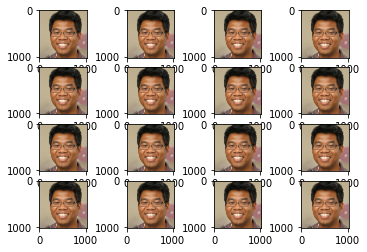

In [101]:
fig = plt.figure(figsize= (4, 4))
fig, axs = plt.subplots(4,4)
cnt = 0
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(image_test[1])
        cnt += 1
plt.show()